In [277]:
# 0. Найдите вашего любимого актера, режиссера, фильм и жанр.
# Том Кукуруз - Tom Cruise, Кристофер Нолан - Christopher Nolan,
# Парк Юрского Периода - Jurrasic Park, комедии - Comedy
# В вопросах у которых стоит значок ❤︎ нужно дополнительно использовать вашего любимого актера, фильм и т.п.

In [278]:
# ❤︎ Фильм - Paddington
# ❤︎ Актер - Maggie Smith
# ❤︎ Режиссер - Guy Ritchie
# ❤︎ Жанр - Comedy

In [279]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv("tmdb_movies.csv")
data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [280]:
print(data.shape)
print(data.columns)

(10866, 21)
Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')


In [281]:
# 1. Какой фильм имеет больше всего оценок? (❤︎)

In [282]:
ft = data[(data["vote_count"] == data["vote_count"].max())]["original_title"]
print("Больше всего оценок имеет:", vt)
fav1 = data[(data["original_title"] == "Paddington")]["vote_count"]
print("У Paddington оценок:", fav1)

Больше всего оценок имеет: 1386    Avatar
Name: original_title, dtype: object
У Paddington оценок: 678    606
Name: vote_count, dtype: int64


In [283]:
# 2. Какой фильм, а также какого жанра и года выпуска, имеет самые высокие оценки? (❤︎)

In [284]:
st = data[(data["vote_average"] == data["vote_average"].max())]["original_title"]
print(st)
gst = data[(data["vote_average"] == data["vote_average"].max())]["genres"]
print(gst)
rst = data[(data["vote_average"] == data["vote_average"].max())]["release_date"]
print(rst)


3894    The Story of Film: An Odyssey
Name: original_title, dtype: object
3894    Documentary
Name: genres, dtype: object
3894    9/3/11
Name: release_date, dtype: object


In [285]:
# 3. Какой фильм самый короткий/длинный по продолжительности? (❤︎)

In [286]:
short = data[(data["runtime"] == data["runtime"].min())]["original_title"]
print("Самые короткие фильмы:", short)
long = data[(data["runtime"] == data["runtime"].max())]["original_title"]
print("Самые длинные фильмы:", long)
fav3 = data[(data["original_title"] == "Paddington")]["runtime"]
print("Длительность Paddington:", fav3)

Самые короткие фильмы: 92           Mythica: The Necromancer
334                           Ronaldo
410                    Anarchy Parlor
445     The Exorcism of Molly Hartley
486                If There Be Thorns
595                         Deep Dark
616                      The Outfield
1241                        Dance-Off
1289                        Treehouse
1293                         Tim Maia
1849                     Spectacular!
2315             Listen to Your Heart
2370                  Freshman Father
3329         Grande, grosso e Verdone
3794             Toi, moi, les autres
3857                         Cell 213
3884                           eCupid
4063           Madea's Family Reunion
4138               A Time for Dancing
4829                             Rags
4944              How to Fall in Love
5216            Madea's Class Reunion
5695                 Skinwalker Ranch
5920           The Food Guide to Love
5938                      Go Goa Gone
5992                 Amiche

In [287]:
# 4. Сколько всего киностудий (product_companies)?

In [288]:
pc = data["production_companies"].str.split("|", expand=True).dropna().to_numpy().ravel()
pc.shape

(5630,)

In [289]:
# 5. Какое количество фильмов сняла каждая из киностудий?

In [290]:
pd.Series(pc).value_counts()

Warner Bros.                              97
Universal Pictures                        68
Canal+                                    66
Twentieth Century Fox Film Corporation    59
Paramount Pictures                        56
                                          ..
Kudos Productions Ltd.                     1
New Regency Productions                    1
Wildlife Films Peru                        1
Les Films Du Fleuve                        1
ApolloProMovie                             1
Length: 2518, dtype: int64

In [291]:
# 6. Сколько фильмов было снято одной киностудией, двумя, тремя и т.д.?

In [292]:
data['production_companies'].str.split('|', expand=True).count(axis=1).value_counts()

1    3440
2    2580
3    1763
5    1126
0    1030
4     927
dtype: int64

In [293]:
# 7. Какая средняя оценка у фильмов с вашим любимым актером?

In [294]:
data[data["cast"].astype(str).str.contains("Maggie Smith")]["vote_average"].mean()

6.372727272727275

In [295]:
# 7.1. Найдите актера, который снимался чаще всего и ответьте на вопрос в каких жанрах? (❤︎)

In [296]:
act = pd.Series(data["cast"].str.split("|", expand=True).dropna().to_numpy().ravel()).mode()[0]
filt = np.nonzero(np.isin(data["cast"].str.split("|", expand=True).to_numpy(), act))[0]
gen = data.iloc[filt]["genres"]
print("Актер, который снимался чаще всего:", act)
print("Снимался в жанрах:", gen)

Актер, который снимался чаще всего: Robert De Niro
Снимался в жанрах: 51                               Comedy
53                         Comedy|Drama
109               Crime|Action|Thriller
494                               Drama
572                              Comedy
                      ...              
10268        Comedy|Crime|Romance|Drama
10272                             Drama
10507    Adventure|Drama|Action|History
10596                       Drama|Crime
10762                         Drama|War
Name: genres, Length: 72, dtype: object


In [297]:
act1 = "Maggie Smith"
filt1 = np.nonzero(np.isin(data["cast"].str.split("|", expand=True).to_numpy(), act1))[0]
gen1 = data.iloc[filt1]["genres"]

print(gen1)

141                      Comedy|Drama
179                      Drama|Comedy
1069             Romance|Comedy|Drama
1469          Adventure|Fantasy|Drama
2010                   Fantasy|Comedy
2614                            Drama
2624                 Comedy|Drama|War
2690           Drama|Mystery|Thriller
3374         Adventure|Family|Fantasy
3493                     Drama|Comedy
3504                 Animation|Family
4500             Drama|Comedy|Romance
6284                           Comedy
7108                    Drama|Romance
7484                    Drama|Romance
8262                     Music|Comedy
8425         Adventure|Fantasy|Family
8554                           Comedy
8900     Thriller|Crime|Mystery|Drama
10334            Fantasy|Drama|Family
10528                   Drama|Romance
10750                           Drama
Name: genres, dtype: object


In [298]:
# 8. Сборы какой кинокомпании самые высокие за последние 5 лет (с 2010 по 2015)?

In [299]:
# 9. Топ-10 режиссеров и актеров с самым высоким в среднем рейтингом фильмов?

In [300]:
# 10. Фильмы в каком жанре в среднем имеют самые высокие оценки? (❤︎)

In [301]:
# 11. Топ-10 ключевых слов (keywords)?

In [302]:
kw = data['keywords'].str.split("|", expand=True).dropna().to_numpy().ravel()
pd.Series(kw).value_counts()

sex                                                          258
based on novel                                               243
independent film                                             175
murder                                                       157
nudity                                                       150
                                                            ... 
fairy-tale figure                                              1
observer                                                       1
bedtime story                                                  1
real life mother and daughter playing mother and daughter      1
incompetence                                                   1
Length: 6411, dtype: int64

In [303]:
# 12. Растет ли бюджет фильмов с каждым годом? (постройте график)

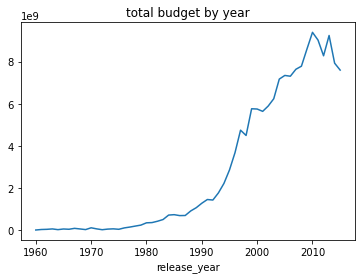

In [304]:
data.groupby('release_year')['budget'].sum().plot(title="total budget by year")

In [305]:
# 13. Что больше всего влияет на доходы фильмов?

In [306]:
# 14. Топ-5 самых прибильных и убыточных фильмов (по соотношению бюджета к доходам)

In [307]:
# 15. Как изменялось количество снимаемых фильмов в жанре "Drama" с течением времени? (Постройте график) ❤︎

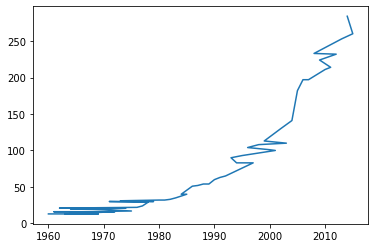

In [308]:
data[data['genres'].astype(str).str.contains("Drama")]['release_year'].value_counts().plot()

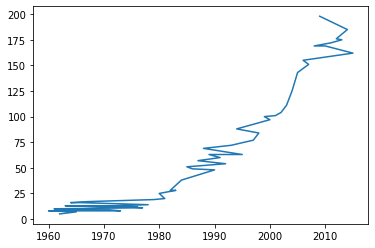

In [309]:
data[data['genres'].astype(str).str.contains("Comedy")]['release_year'].value_counts().plot()

In [310]:
# 16. Топ-10 актеров, которые снялись в наибольшем количестве фильмов

In [311]:
cast = data['cast'].str.split('|', expand=True).dropna().to_numpy().ravel()
pd.Series(cast).value_counts()

Robert De Niro          70
Samuel L. Jackson       67
Nicolas Cage            61
Bruce Willis            61
Michael Caine           52
                        ..
Aileen Quinn             1
Charlie Ray              1
Marc Hosemann            1
Sylvia Syms              1
Patrick John Flueger     1
Length: 18125, dtype: int64

In [312]:
# 17. Средний рейтинг фильмов по годам (постройте график)

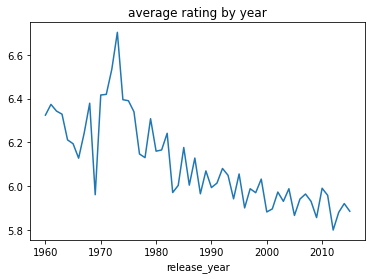

In [313]:
data.groupby('release_year')['vote_average'].mean().plot(title='average rating by year')

In [314]:
# 18. Постройте график распределения жанров (столько-то процентов это боевики, столько-то комедии и т.п.)

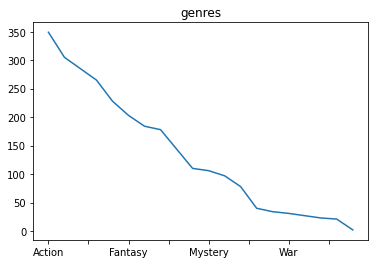

In [315]:
genres = data['genres'].str.split("|", expand=True).dropna().to_numpy().ravel()
pd.Series(genres).value_counts().plot(title = 'genres')

In [316]:
# 19. Какой режиссер чаще всего снимал одного и того же актера?

In [317]:
# 20. Какая пара жанров чаще всего встречается вместе?

In [318]:
# 21. Топ-10 ключевых слов с самым высоким рейтингом/бюджетом/доходами фильмов (слово - срейдний рейтинг/бюджет/доходы)

In [319]:
# 22. Постройте и визуализируйте граф связей между актерами (как это было в работе АПИ ВК).